In [1]:
import artm
import os
import shutil

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
target_folder = os.curdir + '/' +'gutenberg_batches'
shutil.rmtree(target_folder)
os.mkdir(target_folder)
batch_vectorizer = artm.BatchVectorizer(data_path='vw_gutenberg.txt', data_format='vowpal_wabbit', 
                                        target_folder=target_folder, batch_size=100)

In [3]:
target_folder = os.curdir + '/' +'gutenberg_batches'
batch_vectorizer = artm.BatchVectorizer(data_path = target_folder, data_format='batches')

In [57]:
#model.dispose()
topics = 100
model = artm.ARTM(num_topics=topics, topic_names=['Topic' + str(i) for i in range(topics)], 
                  num_document_passes=1, reuse_theta=True, cache_theta=True, seed=-1, class_ids={"text":1})

In [58]:
dictionary = artm.Dictionary('dictionary')
dictionary.gather(batch_vectorizer.data_path)

In [59]:
model.scores.add(artm.PerplexityScore(name='PerplexityScore', dictionary='dictionary'), overwrite=True)
model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore', class_id='text'), overwrite=True)
model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'), overwrite=True)
model.scores.add(artm.TopTokensScore(name="top_words", num_tokens=10, class_id="text"), overwrite=True)

In [60]:
model.initialize('dictionary')

In [61]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

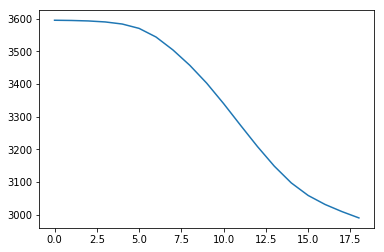

In [62]:
plt.plot(model.score_tracker["PerplexityScore"].value[1:])

In [63]:
for topic_name in model.topic_names[:20]:
    print topic_name + ': ',
    tokens = model.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print
    

Topic0:  said man littl see one say hand know come went
Topic1:  one give much everi new came thought old men two
Topic2:  one make much two seem upon look man littl last
Topic3:  nation total product parti per industri km million growth econom
Topic4:  one state like project new unit go power even public
Topic5:  said may upon first time everi man never make came
Topic6:  may state one gener time work power first chang unit
Topic7:  like know day littl may went great get men good
Topic8:  one said mr like littl upon go look call may
Topic9:  one may see much made seem like even thought ladi
Topic10:  new construct organ result product member industri liber state nation
Topic11:  great one man everi never without time upon even look
Topic12:  one ladi add go never like gervais littl serv old
Topic13:  chang subhead tariff item articl method mexican provid transact region
Topic14:  may work great like never time think without man much
Topic15:  upon like may make new one mr come till st

In [64]:
print model.score_tracker["SparsityPhiScore"].last_value
print model.score_tracker["SparsityThetaScore"].last_value


0.385466288351
0.0


In [65]:
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-10, 
                                                            dictionary=dictionary),overwrite=True)

0.850584585491
0.0105803571429


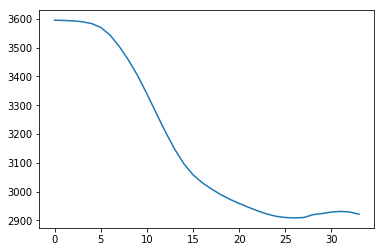

In [66]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)
plt.plot(model.score_tracker["PerplexityScore"].value[1:])
print model.score_tracker["SparsityPhiScore"].last_value
print model.score_tracker["SparsityThetaScore"].last_value

In [67]:
for topic_name in model.topic_names[:20]:
    print topic_name + ': ',
    tokens = model.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

Topic0:  said man come see went littl one hand know say
Topic1:  one new give use natur two electr everi end much
Topic2:  clare ladi madam natur virgin moral john hawthorn one suffer
Topic3:  total nation product parti km per industri runway million chief
Topic4:  project one go look distribut like say made state littl
Topic5:  said hors got came get harri tom look went fire
Topic6:  may result differ work right gener test individu increas one
Topic7:  great day men part hous kill shall know paul appear
Topic8:  mr miss littl hour villag half boffin look bella quarter
Topic9:  may everi even one yet seem mani mind person roman
Topic10:  system labour increas product produc manufactur tend american popul per
Topic11:  great without everi man one men life among even upon
Topic12:  helen gervais holm add lorna cecilia alexina coupeau beauclerc mme
Topic13:  subhead chang tariff item mexican transact method textil woven fabric
Topic14:  thousand may great gener privat letter without year 

In [68]:
#second_model.dispose()

In [69]:

topics = 10
second_model = artm.ARTM(num_topics=topics, topic_names=['Topic' + str(i) for i in range(topics)], 
                  num_document_passes=1, reuse_theta=True, cache_theta=True, seed=-1, class_ids={"text":1})


In [70]:
second_model.scores.add(artm.PerplexityScore(name='PerplexityScore', dictionary='dictionary'), overwrite=True)
second_model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore', class_id='text'), overwrite=True)
second_model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'), overwrite=True)
second_model.scores.add(artm.TopTokensScore(name="top_words", num_tokens=10, class_id="text"), overwrite=True)

In [71]:
second_model.initialize('dictionary')

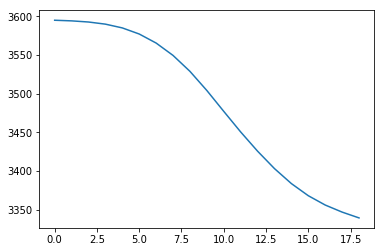

In [72]:
second_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)
plt.plot(second_model.score_tracker["PerplexityScore"].value[1:])

In [73]:
for topic_name in second_model.topic_names:
    print topic_name + ': ',
    tokens = second_model.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print
    

Topic0:  said know man see one lord say great make come
Topic1:  one live said two old make new much see time
Topic2:  one two upon look man much go seem littl side
Topic3:  one shall parti come love time littl live like project
Topic4:  one go like look said made upon littl never even
Topic5:  upon said make may great first time man shall never
Topic6:  gener may state work one chang time unit provid right
Topic7:  like great day know littl look see get come may
Topic8:  shall one said thou thi go upon like may god
Topic9:  one long may think like made project much everi seem


In [74]:
print second_model.score_tracker["SparsityPhiScore"].last_value
print second_model.score_tracker["SparsityThetaScore"].last_value

0.172046987646
0.0


In [75]:
second_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-10000, 
                                                             dictionary=dictionary),overwrite=True)

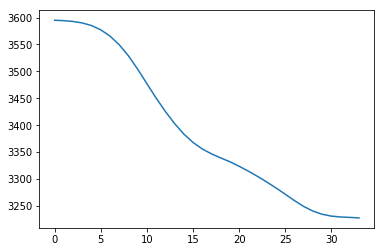

In [76]:
second_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)
plt.plot(second_model.score_tracker["PerplexityScore"].value[1:])

In [77]:
print second_model.score_tracker["SparsityPhiScore"].last_value
print second_model.score_tracker["SparsityThetaScore"].last_value

0.762491581748
0.0


In [56]:
for topic_name in second_model.topic_names:
    print topic_name + ': ',
    tokens = second_model.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print
    

Topic0:  one said upon like look littl man go see shall
Topic1:  one project seem work may state upon much new time
Topic2:  la gener form part water sever larg small nation number
Topic3:  parti chang subhead tariff la articl provid item territori industri
Topic4:  one like may upon littl great said time see made
Topic5:  one shall said upon like come may man go made
Topic6:  unto ye thou per acetylen ga gener nation amori carbid
Topic7:  river sever also great part form two parti number larg
Topic8:  much seem david quit miss becom home enough yahweh moment
Topic9:  power roman may gener form state public number without first


In [78]:
model.save("model_100")
second_model.save("model_10")